
**<span style="color:#448844">Note</span>** This notebook is meant to be interactive. Launch this notebook in Jupyter to see its full potential.


Name: Aaron Palpallatoc

Section: S11

# Ensemble Models Exercise
This exercise will guide you in implementing 3 ensemble models: random forest (bagging), xgboost (boosting), and adaboost (boosting)


## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* There are commented markdown cells that have crumbs. Do not delete them or separate them from the cell originally directly below it.  
* You may add new cells for "scrap work" as long as the crumbs are not separated from the cell below it.
* When you are asked to tweak the parameters/code, make sure you bring it back to the originally requested code or place the tweaked code in a "scrap" cell.
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib inline
# plt.style.use('ggplot')

# plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

# Datasets

In this first section, we will load two datasets: <a href="https://archive-beta.ics.uci.edu/ml/datasets/186">the wine quality dataset</a> and <a href="https://archive-beta.ics.uci.edu/ml/datasets/20">the census income dataset</a>. Both datasets are available on animoopenspace, so please download those two files and make sure they are in the same directory as this notebook.

You can access both datasets and more in the UCI machine learning repository.

__Our regression dataset: wine quality__

In [3]:
df_wine_quality = pd.read_csv("wine_quality.csv", sep=";")

__Our classification dataset: census income dataset__

In [4]:
df_census_income = pd.read_csv("census_income.csv")

### Wine quality dataset
The wine dataset is composed of two files, one for red wine and another for white wine. We will only load the red dataset, but you can load both if you like. We want to know the quality of the wine and assign a score from 0-10. This can be treated as a classification or regression task. There are 1,599 instances in the red wine dataset, and 4,898 instances in the white dataset.

**Attribute Information:**
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality: a score between 0-10 that we want to predict

In [5]:
df_wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Census income dataset
This data was extracted from the US census bureau database found at https://archive-beta.ics.uci.edu/ml/datasets/census+income. The goal of the original study was to determine whether a person makes more than or less than USD 50,000 a year given some other info available in the census. There are technically two files, one each for the training data and the test data, but this notebook only loads the training data.

**Attribute Information:**
- age
- workclass
- fnlwgt (sampling weight -- will be removed)
- education
- educationnum
- maritalstatus
- occupation
- relationship
- race
- sex
- capitalgain
- capitalloss
- hoursperweek
- nativecountry
- label: either '<=50k' or '>50k'

This csv file does not include the column names, so let's add it in first:

In [6]:
df_census_income.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship','race','sex','capitalgain','capitalloss', 'hoursperweek', 'nativecountry', 'label']
df_census_income

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_census_income = df_census_income.drop(["fnlwgt"], axis=1)
df_census_income

,age,workclass,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Decision trees can handle both categorical and numerical features in theory, but sklearn's implementation cannot handle categorical features. We will fix this later.

<hr>

# Making the regression models
We will make 3 regression models: a simple decision tree, a random forest regressor, and a `xgboost` model. All will be trained on the wine quality dataset.

Let's prepare out `X` feature dataset and `y` label vector. Extract the feature columns for `X`, and the label column for `y`

__Hint__ : For `X`, look up `pandas.drop()`. You can convert a DataFrame to a matrix using `your_dataframe.values`

In [8]:
# write code here
X_wine = df_wine_quality.drop(["quality"], axis=1).values
y_wine = df_wine_quality["quality"].values

print(X_wine.shape)
print(y_wine.shape)

(1599, 11)
(1599,)


Split `X_wine` and `y_wine` into training and test sets. Set the random state to `1`.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# write code here
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state=1)

print("wine train and test split")
print("X_train_wine: ", X_train_wine.shape)
print("y_train_wine: ", y_train_wine.shape)
print("X_test_wine: ", X_test_wine.shape)
print("y_test_wine: ", y_test_wine.shape)

wine train and test split
X_train_wine:  (1199, 11)
y_train_wine:  (1199,)
X_test_wine:  (400, 11)
y_test_wine:  (400,)


### Training a simple decision tree

We'll train a decision tree regressor first, then compare its results to the ensemble models.

In [11]:
from sklearn.tree import DecisionTreeRegressor
# DecisionTreeRegressor?

Build a normal regression tree using the default hyperparameters, and train it with our training data

In [12]:
# write code here
dtr = DecisionTreeRegressor()


Get the training predictions

In [13]:
# write code here
predictions_train = dtr.fit(X_train_wine, y_train_wine).predict(X_train_wine)

predictions_train

array([5., 4., 5., ..., 6., 6., 8.])

Note that at this point, the model interpreted our label as a categorical discrete value (1, 2, 3, ...), which is why we don't get decimal values. However, we know that this should be a numerical variable.

Calculate for the mean squared error. We will make a function for both of these because will be computing for the `mse` and `mae` multiple times in the notebook.

___

`compute_rmse()` will compute for the root mean squared error given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `mse`: A scalar representing the root mean squared error between `predictions` and `actual`

In [14]:
def compute_rmse(predictions, actual):
    # write code here
    return np.sqrt(np.mean((actual - predictions)**2))

Compute the train RMSE of the model's predictions vs the ground truth labels

In [15]:
rmse = compute_rmse(predictions_train, y_train_wine)

print("Decision tree regressor training RMSE:", rmse)

Decision tree regressor training RMSE: 0.0


**Sanity Check**: You should get an RMSE of 0.

**Question #1**: Why are we getting an RMSE of 0?

<!--crumb;qna;Question: Why are we getting an RMSE of 0?-->

A: The decision tree model has perfectly fit the training data. The model's predictions match the actual values exactly for the training dataset.

__Question #2:__ In what situation can decision tree regressors not get an RMSE of 0 despite overfitting?

<!--crumb;qna;Question: In what situation can decision tree regressors not get an RMSE of 0 despite overfitting?-->

A: It cannot get RMSE of 0 despite overfitting when there's overlapping classes in the data or the model is evaluated on unseen data.

Let's test our model on the test set. Run predictions on the test set.

In [16]:
# write code here
predictions_test = dtr.fit(X_train_wine, y_train_wine).predict(X_test_wine)

predictions_test

array([5., 5., 7., 6., 6., 5., 7., 5., 5., 6., 6., 5., 6., 6., 7., 6., 6.,
       5., 6., 5., 6., 7., 5., 6., 5., 6., 5., 5., 5., 7., 6., 6., 5., 7.,
       5., 6., 5., 5., 7., 5., 6., 5., 5., 4., 5., 6., 5., 6., 5., 7., 5.,
       7., 5., 5., 7., 6., 6., 5., 7., 5., 6., 4., 5., 5., 5., 5., 6., 6.,
       6., 7., 5., 6., 6., 6., 5., 5., 7., 5., 5., 6., 5., 6., 5., 5., 7.,
       5., 4., 7., 5., 6., 5., 6., 6., 7., 7., 5., 7., 6., 5., 7., 5., 5.,
       5., 5., 5., 5., 5., 6., 5., 6., 7., 6., 5., 5., 6., 7., 5., 5., 5.,
       5., 5., 7., 6., 4., 5., 5., 6., 5., 7., 5., 6., 5., 6., 5., 5., 7.,
       6., 7., 6., 6., 5., 5., 5., 5., 6., 6., 6., 5., 5., 6., 5., 6., 5.,
       6., 6., 6., 7., 6., 5., 6., 8., 5., 5., 5., 6., 6., 6., 5., 5., 6.,
       6., 6., 5., 5., 6., 5., 6., 4., 5., 5., 6., 7., 6., 5., 6., 6., 7.,
       6., 4., 5., 5., 5., 6., 5., 5., 6., 6., 5., 6., 5., 6., 5., 7., 5.,
       7., 6., 5., 5., 6., 6., 5., 6., 5., 6., 5., 6., 5., 5., 6., 6., 5.,
       5., 4., 4., 6., 5.

Let's get the test performance

In [17]:
rmse = compute_rmse(predictions_test, y_test_wine)

print("Decision tree regressor test RMSE:", rmse)

Decision tree regressor test RMSE: 0.8231038816577164


**Sanity Check**: The RMSE here should be higher than the training data RMSE.

__Visualizing our decision tree regressor__

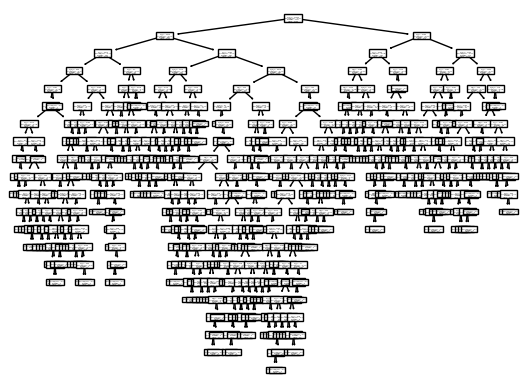

In [18]:
from sklearn import tree

tree.plot_tree(dtr)
plt.show()

### Training a random forest regression model

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
# RandomForestRegressor?

Train a random forest model with 300 base models. You can check out the other parameters in `RandomForestRegressor` and tweak it later. For now, create a random forest with `300` base models and train it. Set the random state to `42`.

In [21]:
# write code here
rfr = RandomForestRegressor(n_estimators=300, random_state=42)


Run predictions on the train set

In [22]:
# write code here
predictions_train = rfr.fit(X_train_wine, y_train_wine).predict(X_train_wine)

predictions_train

array([5.30666667, 4.36666667, 5.35333333, ..., 5.92666667, 5.97333333,
       7.67333333])

**Questoin #2:** Why are we getting floats and not integers as our predictions?

A: Because the RandomForestRegressor makes a prediction by averaging the predictions of all the trees in the forest.

Compute the train RMSE of the model's predictions vs the ground truth labels

In [23]:
rmse = compute_rmse(predictions_train, y_train_wine)

print("Random forest regressor test RMSE:", rmse)

Random forest regressor test RMSE: 0.21524593541876452


**Sanity check:** The RMSE should be ~0.2152.

**Question #3:** Random forests are supposed to have a lower loss than decision trees. Why is our random forest's RMSE larger than our decision tree's RMSE?

<!--crumb;qna;Question: Random forests are supposed to have a lower loss than decision trees. Why is our random forest's RMSE larger than our decision tree's RMSE?-->

A:  It is because the decision tree overfits the training data (100% accurate), while random forest is an ensemble of decision trees that are trained on different subsets of the data.

Let's now try our random forest's performance on our test set

In [24]:
# write code here
predictions_test = rfr.fit(X_train_wine, y_train_wine).predict(X_test_wine)

predictions_test

array([5.32666667, 5.54      , 6.47666667, 5.86666667, 6.07333333,
       6.21333333, 6.21666667, 5.04333333, 5.47      , 5.37      ,
       5.99      , 5.15333333, 5.55333333, 6.73666667, 5.94666667,
       5.5       , 6.17666667, 5.53      , 5.6       , 5.19666667,
       5.90333333, 6.30666667, 5.22      , 6.31333333, 5.43      ,
       6.47333333, 6.06333333, 5.63      , 5.29333333, 6.79      ,
       5.7       , 6.20333333, 5.18333333, 6.44      , 5.17      ,
       5.58      , 5.07      , 5.48666667, 6.79666667, 5.05      ,
       6.06      , 5.09333333, 5.07333333, 5.84666667, 5.02      ,
       5.92      , 5.11      , 5.22      , 5.31333333, 6.24666667,
       5.02666667, 5.24333333, 6.46666667, 4.98666667, 5.56666667,
       5.98666667, 6.31666667, 6.02666667, 5.83666667, 5.05666667,
       6.29333333, 4.83333333, 5.10666667, 5.49      , 4.98666667,
       5.56666667, 6.88666667, 5.78666667, 5.85333333, 6.69      ,
       5.17      , 6.29      , 5.75666667, 5.64      , 5.02666

Get the test RMSE

In [25]:
rmse = compute_rmse(predictions_test, y_test_wine)

print("Random forest regressor test RMSE:", rmse)

Random forest regressor test RMSE: 0.5633719168246378


Compare our random forest's RMSE compared to the decision tree's RMSE on the test set. The random forest should have a smaller test RMSE.

__Question #4:__ What is the test RMSE of our random forest regressor?

<!--crumb;qna;Question: What is the test RMSE of our random forest regressor?-->

A: 0.5633719168246378

**Question #5:** Why is our random forest's test RMSE smaller than the decision tree's RMSE?

<!--crumb;qna;Question: Why is our random forest's test RMSE smaller than the decision tree's RMSE?-->

A: This is because the random forest is trained on different subsets of the data, lowering the variance while the decision tree which has high variance performs poorly on unseen data.

**Let's visualize one random forest base model.** If you remember, in our lecture, we do not mind a overfit base model. Let's see the effect here now.

In the following cell, Get the fist base model from the random forest model

In [26]:
# write code here
estimator = rfr.estimators_[0]

estimator

DecisionTreeRegressor(max_features=1.0, random_state=1608637542)

The code below will generate one estimator/base model. Note that each model image will be around ~12MB.

```
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='rf_regression_base_tree.dot', 
                feature_names = df_wine_quality.drop(columns="quality").columns,
                class_names = df_wine_quality["quality"].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'rf_regression_base_tree.dot', '-o', 'rf_regression_base_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'rf_regression_base_tree.png')
```

<font color="red"> __Note:__ You need to run the code above to answer the question below, __but make sure that you delete the code cell before you submit your notebook. Failure to delete it will result in major deductions__ </font>

__Question #6:__ How will you describe the figure shown above?

<!--crumb;qna;Question: How will you describe the figure shown above?-->

A: In this base model, it seems like the best question to ask is the alcohol value (root node). As the random forest suggests, the features are randomly selected on each layer (alchol then sulphates). The model is very deep, a lot of layers and nodes which are very specific rules that perfectly fit its training data.

Applying what you have learned from the previous notebook, get the base estimator's number of nodes.

In [27]:
# write code here
estimator.tree_.node_count

459

Get the base estimator's max tree depth.

In [28]:
# write code here
estimator.tree_.max_depth

18

__Question #7:__ How many nodes does this estimator have?

<!--crumb;qna;Question: How many nodes does this estimator have?-->

A: 459

__Question #8:__ What is the max depth of this estimator?

<!--crumb;qna;Question: What is the max depth of this estimator?-->

A: 18 

<hr>

# Making the classifier models
We will make 3 models: a simple decision tree, a random forest classifier, and a adaboost model. All models will be trained on the census income dataset.

In [29]:
df_census_income

,age,workclass,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


While decision trees can handle a mix of categorical and numerical feature data in theory, sklearn's implementation of decision trees and random forests can unfortunately only handle numerical features. 

To make our model still accept the entirety of our census income dataset, we will **label encode** our categorical data. **Label encoding** means that we will be assigning an integer to each possible class in one feature, and use these label-numbers as our new data.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-baqh{text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">fruit</th>
    <th class="tg-1wig">label_encoded_fruit</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-baqh">apple</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">banana</td>
    <td class="tg-baqh">2</td>
  </tr>
  <tr>
    <td class="tg-baqh">orange</td>
    <td class="tg-baqh">3</td>
  </tr>
  <tr>
    <td class="tg-baqh">apple</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">apple</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">orange</td>
    <td class="tg-baqh">3</td>
  </tr>
  <tr>
    <td class="tg-baqh">banana</td>
    <td class="tg-baqh">2</td>
  </tr>
  <tr>
    <td class="tg-baqh">banana</td>
    <td class="tg-baqh">2</td>
  </tr>
  <tr>
    <td class="tg-baqh">banana</td>
    <td class="tg-baqh">2</td>
  </tr>
  <tr>
    <td class="tg-baqh">apple</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">apple</td>
    <td class="tg-baqh">1</td>
  </tr>
  <tr>
    <td class="tg-baqh">orange</td>
    <td class="tg-baqh">3</td>
  </tr>
</tbody>
</table>

The table above shows a column called `fruit`. After label encoding the`fruit` column, we assign each fruit to the following integers:
<center> apple: 1 </center>
<center> banana: 2 </center>
<center> orange: 3</center>
This gives us the new column `label_encoded_fruit`. 

Fortunately, sklearn has a pre-defined code called `LabelEncorder` to automatically do the assignment mapping for us.

### Preparing our dataset

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Let's select the categorical features that will be transformed:

In [31]:
categorical_columns = df_census_income.select_dtypes(include=[object]).columns

Then, we'll call the `encoder.fit_transform()` function on each categorical column

In [32]:
encoded_columns = df_census_income[categorical_columns].apply(encoder.fit_transform)
encoded_columns

,workclass,education,maritalstatus,occupation,relationship,race,sex,nativecountry,label
0,6,9,2,4,0,4,1,39,0
1,4,11,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,9,2,10,5,2,0,5,0
4,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0
32556,4,11,2,7,0,4,1,39,1
32557,4,11,6,1,4,4,0,39,0
32558,4,11,4,1,3,4,1,39,0


We can also call the encoder to fit transform each column manually. That way we can also see which feature categories are labelled as `0,..,n`

Since we applied `fit_transform` using pandas' `apply` function, we can only get the last column it converted. The cell bellow shows what `0` and `1` mean for the `label` column.

In [33]:
mapping = dict(zip(encoder.classes_, range(0, len(encoder.classes_)+1)))
mapping

{' <=50K': 0, ' >50K': 1}

We will set the all the categorical columns to have this newly transformed data

Assign the categorical columns to the new encoded data

In [34]:
# write code here
df_census_income[categorical_columns] = encoded_columns

df_census_income

,age,workclass,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,6,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,39,0


Separate our features from our labels

In [35]:
# write code here
X_census = df_census_income.drop(["label"], axis=1)
y_census = df_census_income["label"]

And, split our data into training and test data. Set the random state to `42`.

In [36]:
# write code here
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_census, y_census, random_state=42)

print("wine train and test split")
print("X_train_census: ", X_train_census.shape)
print("y_train_census: ", y_train_census.shape)
print("X_test_census: ", X_test_census.shape)
print("y_test_census: ", y_test_census.shape)

wine train and test split
X_train_census:  (24420, 13)
y_train_census:  (24420,)
X_test_census:  (8140, 13)
y_test_census:  (8140,)


### Training a simple decision tree classifier

We'll train a decision tree first then compare its performance to the ensemble models.

In [37]:
from sklearn.tree import DecisionTreeClassifier

Train a decision tree with the default hyperparameters

In [38]:
# write code here
dtc = DecisionTreeClassifier()


Run predictions on the train set

In [39]:
# write code here
predictions_train = dtc.fit(X_train_census, y_train_census).predict(X_train_census)

predictions_train

array([0, 0, 0, ..., 0, 0, 0])

We will be computing for the accuracy multiple times in this notebook, so let's create a function for this.

`compute_accuracy()` will compute for the accuracy given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `accuracy`: A scalar representing the percentage of elements where `predictions` and `actual` match out of the total number of elements

In [40]:
def compute_accuracy(predictions, actual):
    # write code here
    accuracy = np.sum(predictions == actual) / len(actual)
    return accuracy * 100

Let's get the training accuracy

In [41]:
acc = compute_accuracy(predictions_train, y_train_census)

print("Decision tree classifier train accuracy:", acc, "%")

Decision tree classifier train accuracy: 98.001638001638 %


**Sanity check:** The accuracy should be ~98%.

Let's try our model on the test set

In [42]:
# write code here
predictions_test = dtc.predict(X_test_census)

predictions_test

array([0, 0, 1, ..., 0, 0, 0])

Get the test accuracy

In [43]:
acc = compute_accuracy(predictions_test, y_test_census)

print("Decision tree classifier test accuracy:", acc, "%")

Decision tree classifier test accuracy: 81.26535626535627 %


__Question #9:__ What is the decision tree classifier's test accuracy?

<!--crumb;qna;Question: What is the decision tree classifier's test accuracy?-->

A: 81.26535626535627 %

### Training a random forest classifier
We will use the `sklearn.ensemble.RandomForestClssifier` library to make a random forest classifier.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# RandomForestClassifier?

Train a random forest model with `300` base models. You can check out the other parameters in `RandomForestClassifier` and tweak it later. Set the random state to `42`.

In [46]:
# write code here
rfc = RandomForestClassifier(n_estimators=300, random_state=42)


In [47]:
# write code here
predictions_train = rfc.fit(X_train_census, y_train_census).predict(X_train_census)

predictions_train

array([0, 0, 0, ..., 0, 0, 0])

Get the training performance

In [48]:
acc = compute_accuracy(predictions_train, y_train_census)

print("Random forest classifier train accuracy:", acc, "%")

Random forest classifier train accuracy: 98.001638001638 %


The random forest classifier's train accuracy should be lower than the decision tree classifier's train accuracy.

**Question #10:** What will happen to the training accuracy if we have a lower number of base models?

<!--crumb;qna;Question: What will happen to the training accuracy if we have a lower number of base models?-->

A: It might become less accurate on the training set. This is because each tree in Random Forest is trained on a different subset of data, and the final prediction is an average of the predictions from all the trees. Fewer trees = less diversity in the predictions and less able to capture complex patterns in the data.

Let's now try our random forest's performance on our test set

In [49]:
# write code here
predictions_test = rfc.predict(X_test_census)

predictions_test

array([0, 0, 1, ..., 0, 0, 0])

Get the test performance

In [50]:
acc = compute_accuracy(predictions_test, y_test_census)

print("Random forest classifier test accuracy:", acc, "%")

Random forest classifier test accuracy: 85.0 %


Compare our random forest's accuracy compared to the decision tree's accuracy on the test set. The random forest should have a higher test accuracy.

__Feature importance.__ Get the feature importance detected by the random forest classifier

In [51]:
# write code here
feature_importance = rfc.feature_importances_

feature_importance

array([0.21717935, 0.05152579, 0.03592464, 0.09873722, 0.0710063 ,
       0.08770907, 0.11828276, 0.01769434, 0.01314798, 0.11878641,
       0.03849873, 0.11072109, 0.02078634])

__Sanity check:__ You should see a vector of length `13`, one for each of our features

The following code will allow us to see the feature importance next to the feature name

In [52]:
df_rfc_importance = pd.DataFrame(data=feature_importance, index=df_census_income.drop(["label"], axis=1).columns, columns=["importance"])
df_rfc_importance

,importance
age,0.217179
workclass,0.051526
education,0.035925
educationnum,0.098737
maritalstatus,0.071006
occupation,0.087709
relationship,0.118283
race,0.017694
sex,0.013148
capitalgain,0.118786


__Question #11:__ What are the top 4 most discriminating features? Order them from most important to least important.

<!--crumb;qna;Question: What are the top 4 most discriminating features? Order them from most important to least important.-->

A: age, capitalgain, relationship, hoursperweek

__Question #12:__ What are the top 2 least discriminating features? Least important first.

<!--crumb;qna;Question: What are the top 2 least discriminating features? Least important first.-->

A: sex, race 

__Question #13:__ What can you, as a modeller, do with this list of feature importance?

<!--crumb;qna;Question: What can you, as a modeller, do with this list of feature importance?-->

A: We can simplify the model by removing less important features and potentially improve performance. It can also help us understand the model and can guide in creating new features (similar to the important ones or create interactions between important features).

### Training an adaboost classifier
We can use the `sklearn.ensemble.AdaBoostClassifier` library to code our adaboost classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
# AdaBoostClassifier?

Train a adaboost model with `300` base models. You can check out the other parameters in `AdaBoostClassifier` and tweak it later. Set the random state to `42`.

In [55]:
# write code here
abc = AdaBoostClassifier(n_estimators=300, random_state=42)


Get the training predictions

In [56]:
# write code here
predictions_train = abc.fit(X_train_census, y_train_census).predict(X_train_census)

predictions_train

array([0, 0, 0, ..., 0, 0, 0])

Get the training accuracy

In [57]:
acc = compute_accuracy(predictions_train, y_train_census)

print("Adaboost classifier train accuracy:", acc, "%")

Adaboost classifier train accuracy: 87.06388206388206 %


**Sanity check:** The accuracy should be ~87%.

**Question #14:** What will happen to the train accuracy if our adaboost model has a lower number of base models?

<!--crumb;qna;Question: What will happen to the train accuracy if our adaboost model has a lower number of base models?-->

A: The algorithm's capacity to fix errors decreases with a fall in base model count, which lowers train accuracy. This is due to the sequential nature of boosting algorithms like AdaBoost, whereby errors in one base model are attempted to be corrected in a subsequent base model.

Let's now try our adaboost models's performance on our test set

In [58]:
# write code here
predictions_test = abc.predict(X_test_census)

predictions_test

array([0, 1, 1, ..., 0, 0, 1])

Get the test accuracy

In [59]:
acc = compute_accuracy(predictions_test, y_test_census)

print("Adaboost classifier test accuracy:", acc, "%")

Adaboost classifier test accuracy: 87.05159705159706 %


__Question #15:__ What is the Adaboost classifier's test accuracy?

<!--crumb;qna;Question: What is the Adaboost classifier's test accuracy?-->

A: 87.05159705159706 %

__Question #16:__ Why is it expected for the decision tree classifier to equal or outperform the ensemble models in terms of training performance?

<!--crumb;qna;Question: Why is it expected for the decision tree classifier to equal or outperform the ensemble models in terms of training performance?-->

A:  Decision trees without restriction can grow very deep to perfectly fit the training data (achieving 100% accuracy). On the other hand, ensemble models are designed to improve generalization performance (performance on unseen data).

__Question #17:__ Why did both ensemble models outperform the decision tree classifier in terms of test performance?

<!--crumb;qna;Question: Why did both ensemble models outperform the decision tree classifier in terms of test performance?-->

A: This is because ensemble models performs well on unseen data than the decision tree classifier. The "average" decision tree produced by ensemble models will be able to generalize more effectively than the decision tree classifier by averaging the predictions of the base models.

**Let's visualize one adaboost base model.** Get the fist base model from the Adaboost model

In [60]:
estimator = abc.estimators_[0]

estimator

DecisionTreeClassifier(max_depth=1, random_state=1608637542)

In [61]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='ab_classification_base_tree.dot', 
                feature_names = df_census_income.drop(columns="label").columns,
                class_names = encoder.classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call

call(['dot', '-Tpng', 'ab_classification_base_tree.dot', '-o', 'ab_classification_base_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'ab_classification_base_tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

**Note:** You can edit the .dot files to configure how the tree will be graphed.

**Note:** You can also change the estimator index to select the base model you want to visualize.

__Question #18:__ How will you describe the tree/chart above?

<!--crumb;qna;Question: How will you describe the tree/chart above?-->

A: It only shows a root node and 2 leaf nodes, which is intended to be (rather than a complete decision tree) because it is only a stub designed to fix the errors in the prior base model.

__Question #19:__ What feature was used in the __first__ decision stump?

<!--crumb;qna;Question: What feature was used in the first decision stump?-->

A: The 'relationship' feature

<hr>

# Summary

* Ensemble models generally have a lower a training error than its overfit single decision tree counterparts

* Their advantage of using ensemble models is its ability to lower the test (and validation) error through the way it "manipulated" the bias-variance decomposition

* We did not make a new model, we just used a simple decision tree as our base models, and built a meta learning algorithm over it.

* The benefits of using ensemble models may seem small right now, but the effect is clearer with more complex datasets.

**References:**
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
  
- Ron Kohavi (1996). Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining.

## <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->